In [1]:
import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/SEM 7/Specs Prj/Project

/content/drive/My Drive/SEM 7/Specs Prj/Project


#Loading all the models

In [3]:
alexNet = keras.models.load_model("./SavedModels/AlexNet")

In [4]:
inceptionNet = keras.models.load_model("./SavedModels/InceptionNet")

In [5]:
mobileNetV1 = keras.models.load_model("./SavedModels/MobileNetV1")

In [6]:
resNet50 = keras.models.load_model("./SavedModels/ResNet50")

In [7]:
vgg16 = keras.models.load_model("./SavedModels/VGG16")

In [8]:
cnnLstm = keras.models.load_model("./SavedModels/CNN+LSTM")

#Loading an image

In [9]:
import random 
import os

In [10]:
pathV = "./Key Frames(Final)/test/Violence"
pathNV = "./Key Frames(Final)/test/Non Violence"

In [11]:
filesV = os.listdir(pathV)
filesNV = os.listdir(pathNV)

In [12]:
#randomly choosing an image from the test images
imageV = random.choice(filesV)
imageNV = random.choice(filesNV)

In [13]:
type(imageV), imageV, imageNV

(str, 'v131_9.jpeg', 'nv_6704.jpeg')

#LIME

In [14]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 13.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ffa256f110bdf0f0e7e61db442d90089cbec51f8bcd8f5102a4eb98ab685545e
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [15]:
from keras.applications.imagenet_utils import decode_predictions
import cv2
from tensorflow.keras.preprocessing import image
from skimage import io
import skimage

In [16]:
def loadImg(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (75,75))
  img = img/255
  img = np.expand_dims(img, axis = 0)
  return img

In [17]:
imgV = loadImg(pathV + "/" + imageV)
imgNV = loadImg(pathNV + "/" + imageNV)

In [18]:
def superpixels(explanation, img, labelNum):
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[labelNum],
                                               positive_only=True, num_features=10, hide_rest=False)
  plt.figure(figsize = (18,18))
  plt.subplot(1,3,1)
  plt.title("The Image")
  plt.imshow(mark_boundaries(temp / 2 + 0.1, mask))

  plt.subplot(1,3,2)
  plt.title("Predicted as Violence")
  ind = explanation.top_labels[0]
  dictHeatmap = dict(explanation.local_exp[ind])
  heatmap = np.vectorize(dictHeatmap.get)(explanation.segments)

  plt.imshow(heatmap, cmap = "RdBu", vmin = -heatmap.max(), vmax = heatmap.max())
  plt.colorbar()

  plt.subplot(1,3,3)
  plt.title("Predicted as Non Violence")
  ind = explanation.top_labels[1]
  dictHeatmap = dict(explanation.local_exp[ind])
  heatmap = np.vectorize(dictHeatmap.get)(explanation.segments)

  plt.imshow(heatmap, cmap = "RdBu", vmin = -heatmap.max(), vmax = heatmap.max())
  plt.colorbar()

In [19]:
from lime import lime_image

##InceptionNet

In [20]:
explainerInceptionNet = lime_image.LimeImageExplainer()

In [21]:
explanationInceptionNetV = explainerInceptionNet.explain_instance(imgV[0].astype('double'), inceptionNet.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 88ms/step


In [22]:
explanationInceptionNetNV = explainerInceptionNet.explain_instance(imgNV[0].astype('double'), inceptionNet.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


In [23]:
from skimage.segmentation import mark_boundaries

###Superpixel for the prediction

####Violence

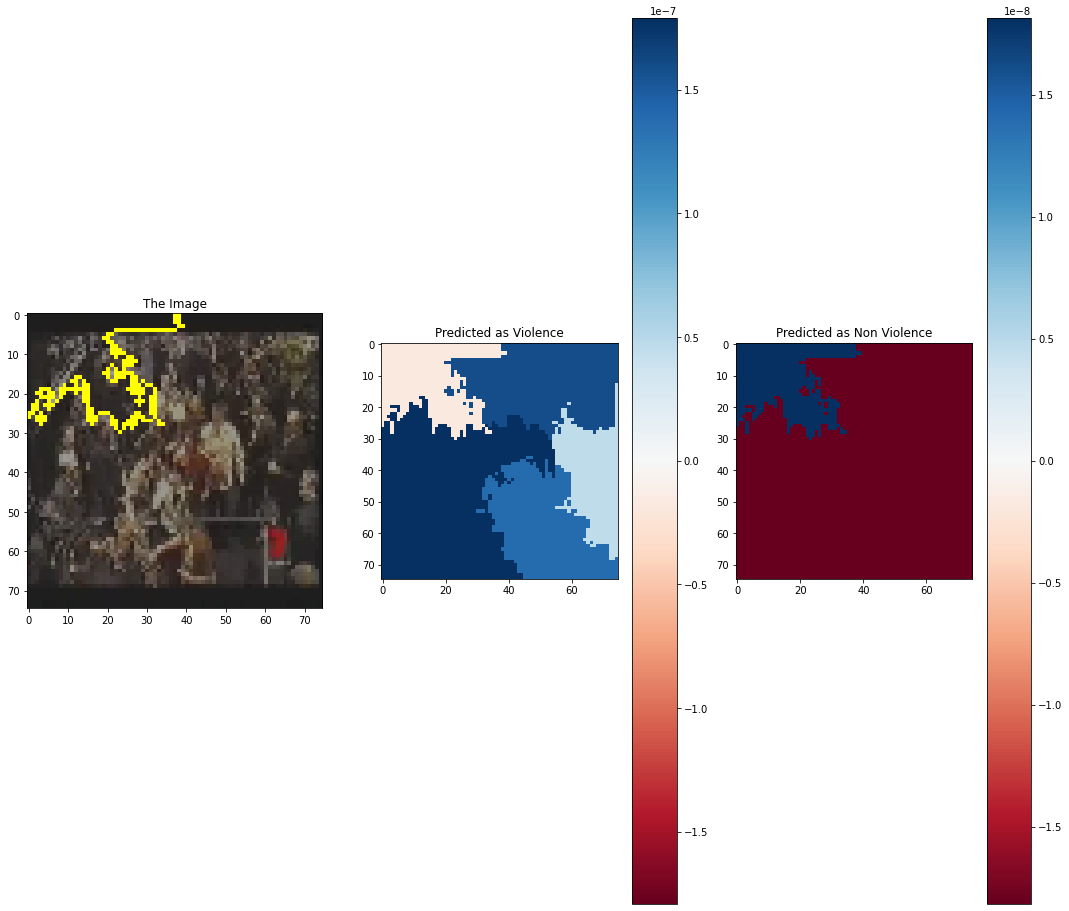

In [55]:
superpixels(explanationInceptionNetV, imgV, 0)

####Non Violence

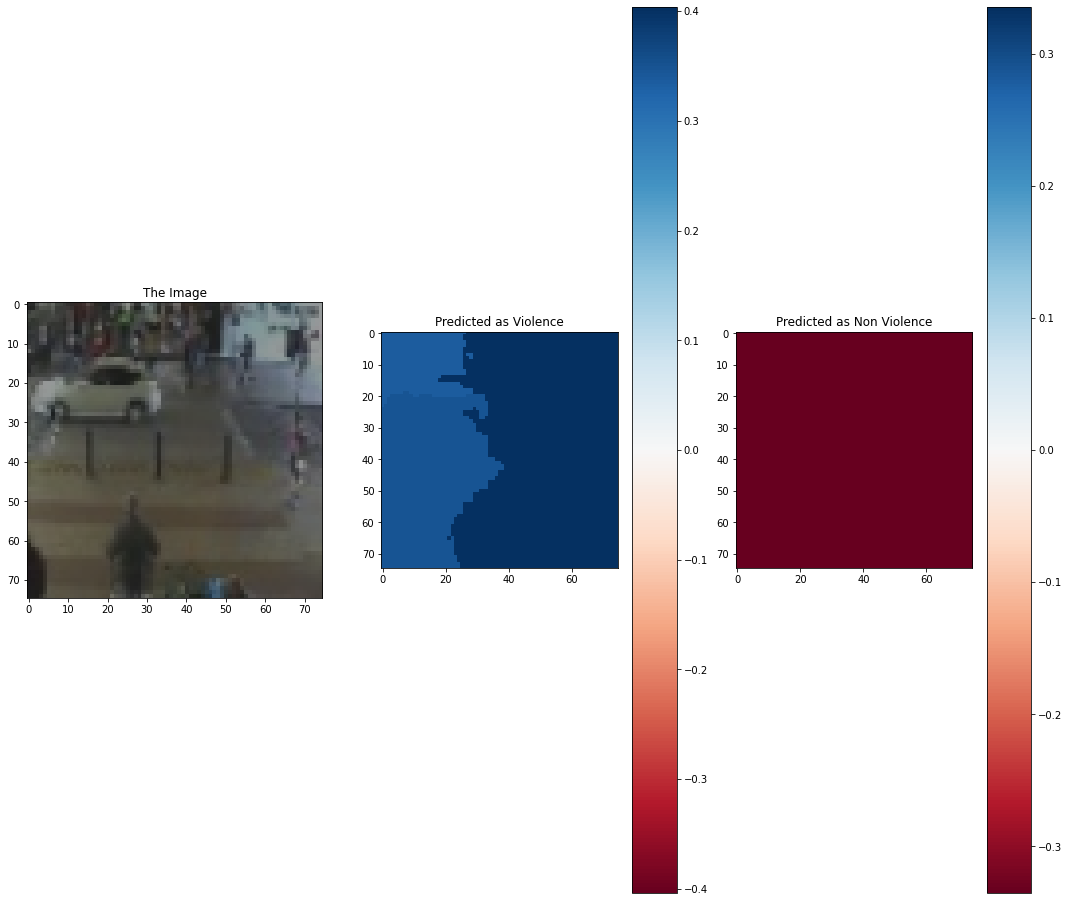

In [25]:
superpixels(explanationInceptionNetNV, imgNV, 1)

##MobileNetV1

In [26]:
explainerMobileNetV1 = lime_image.LimeImageExplainer()

In [27]:
explanationMobileNetV1V = explainerMobileNetV1.explain_instance(imgV[0].astype('double'), mobileNetV1.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


In [28]:
explanationMobileNetV1NV = explainerMobileNetV1.explain_instance(imgNV[0].astype('double'), mobileNetV1.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


###Superpixel for the prediction 

####Violence

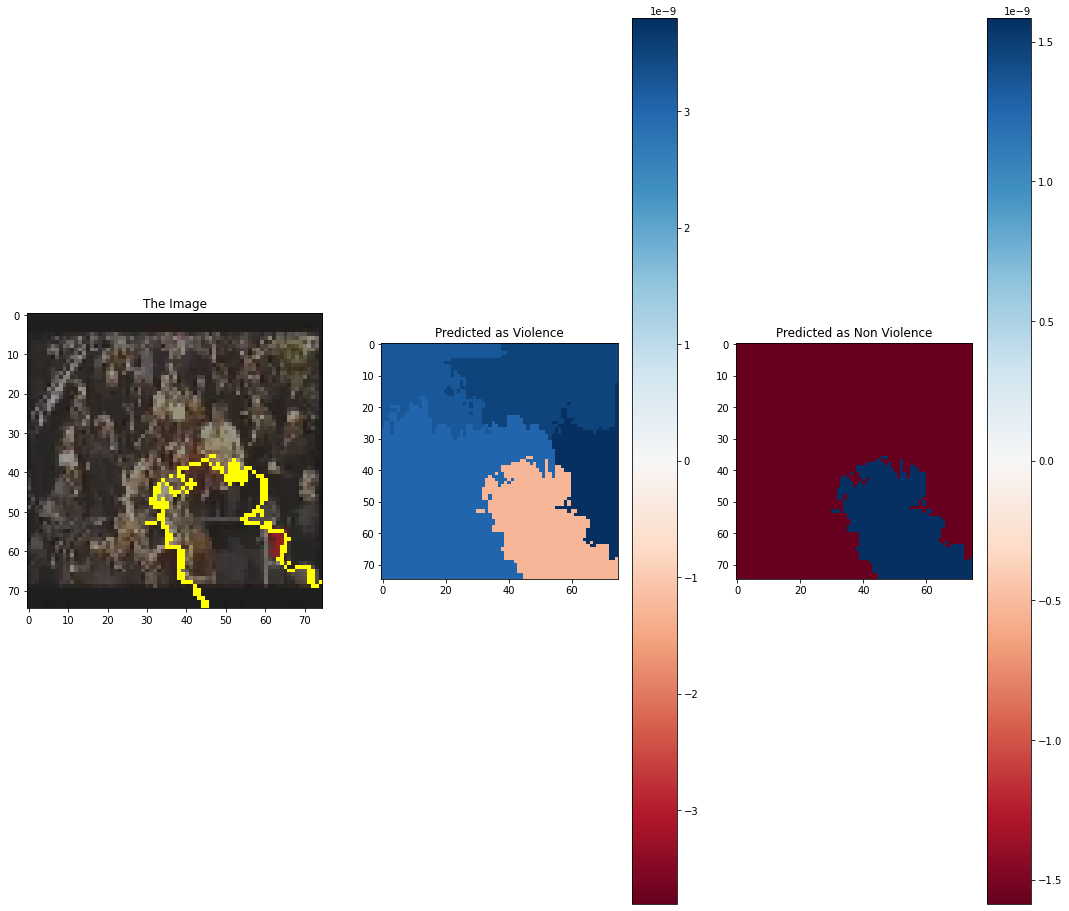

In [29]:
superpixels(explanationMobileNetV1V, imgV, 0)

####Non Violence

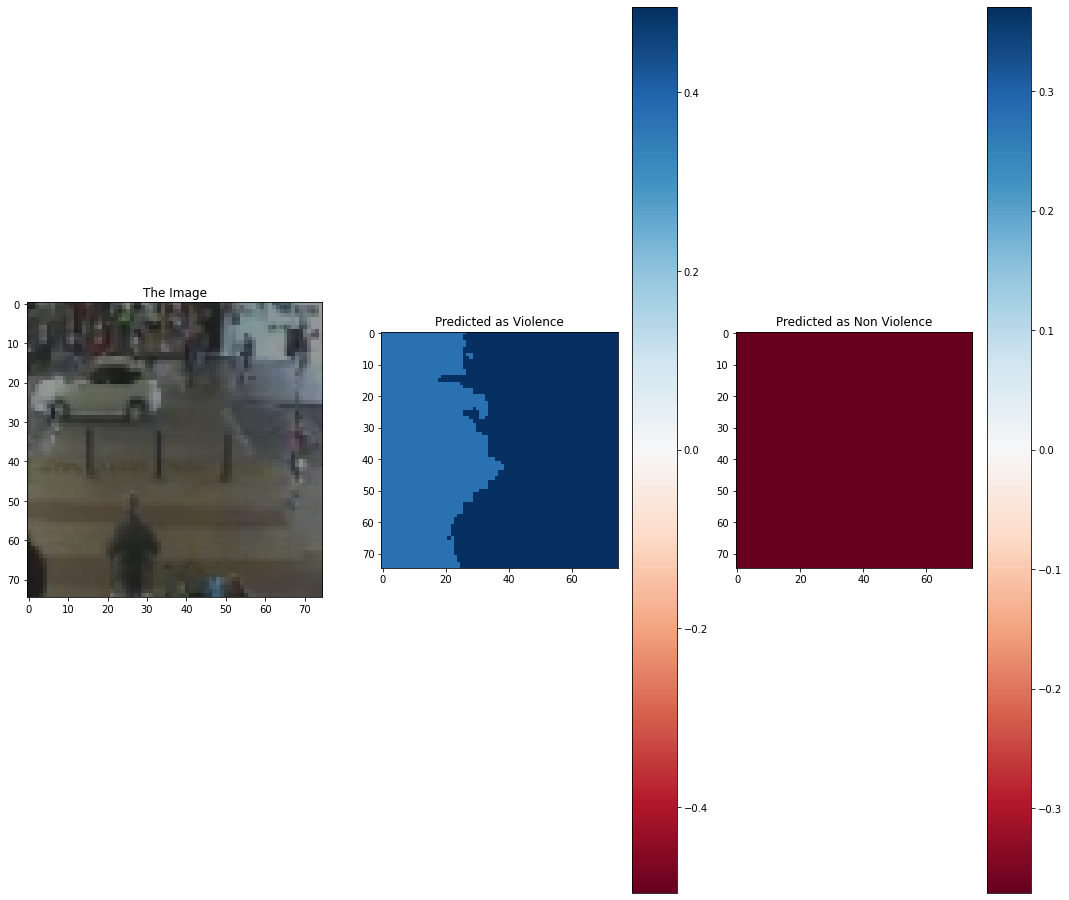

In [30]:
superpixels(explanationMobileNetV1NV, imgNV, 1)

##ResNet50

In [31]:
explainerResNet50 = lime_image.LimeImageExplainer()

In [32]:
explainerResNet50V = explainerResNet50.explain_instance(imgV[0].astype('double'), resNet50.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


In [33]:
explainerResNet50NV = explainerResNet50.explain_instance(imgNV[0].astype('double'), resNet50.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


###Superpixel for the prediction

####Violence

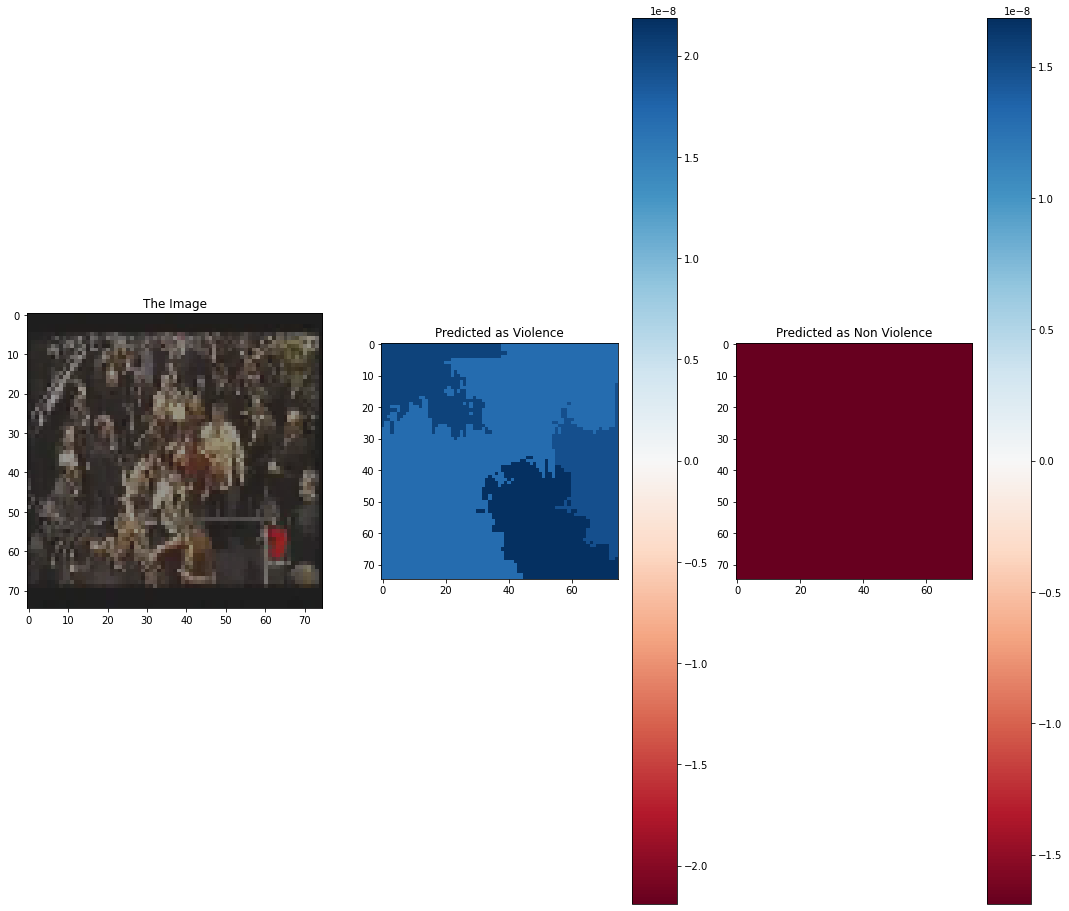

In [34]:
superpixels(explainerResNet50V, imgV, 0)

####Non Violence

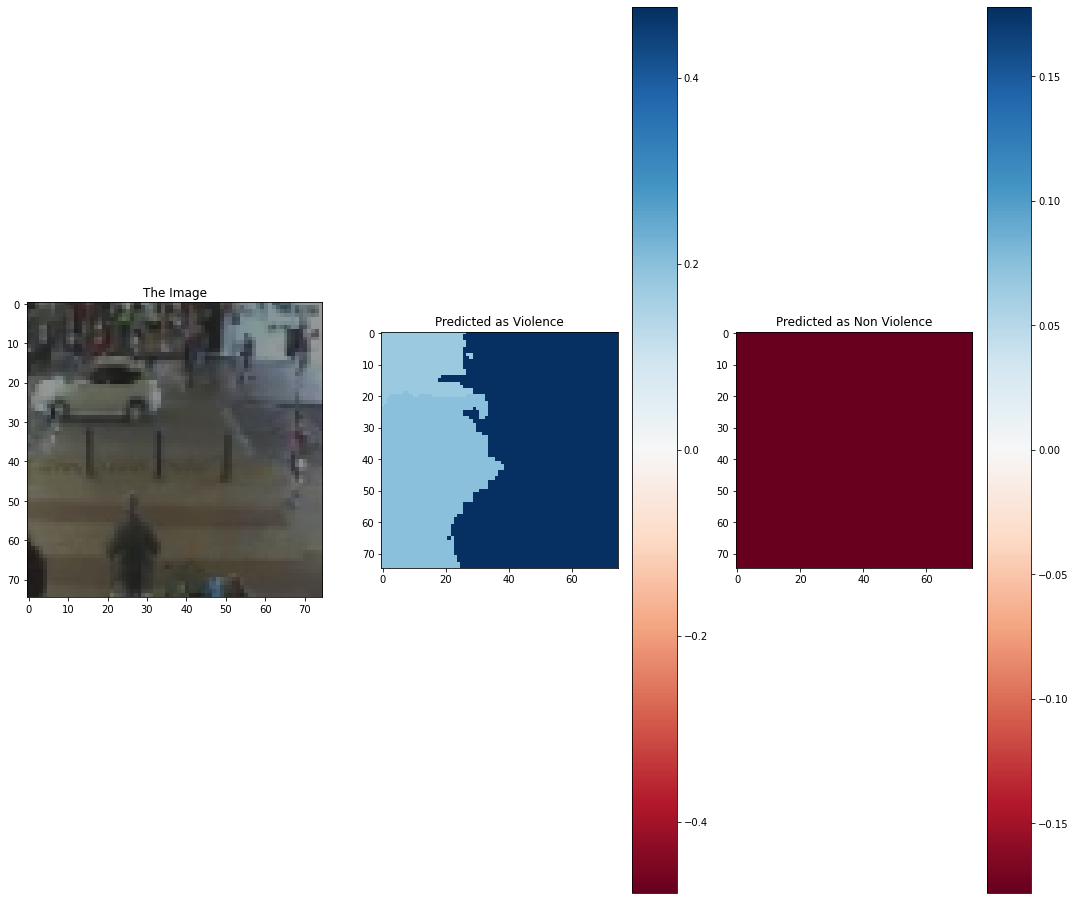

In [35]:
superpixels(explainerResNet50NV, imgNV, 1)

##VGG16

In [36]:
explainerVGG16 = lime_image.LimeImageExplainer()

In [37]:
explanationVGG16V = explainerVGG16.explain_instance(imgV[0].astype('double'), vgg16.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


In [38]:
explanationVGG16NV = explainerVGG16.explain_instance(imgNV[0].astype('double'), vgg16.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


###Superpixel for the prediction

####Violence

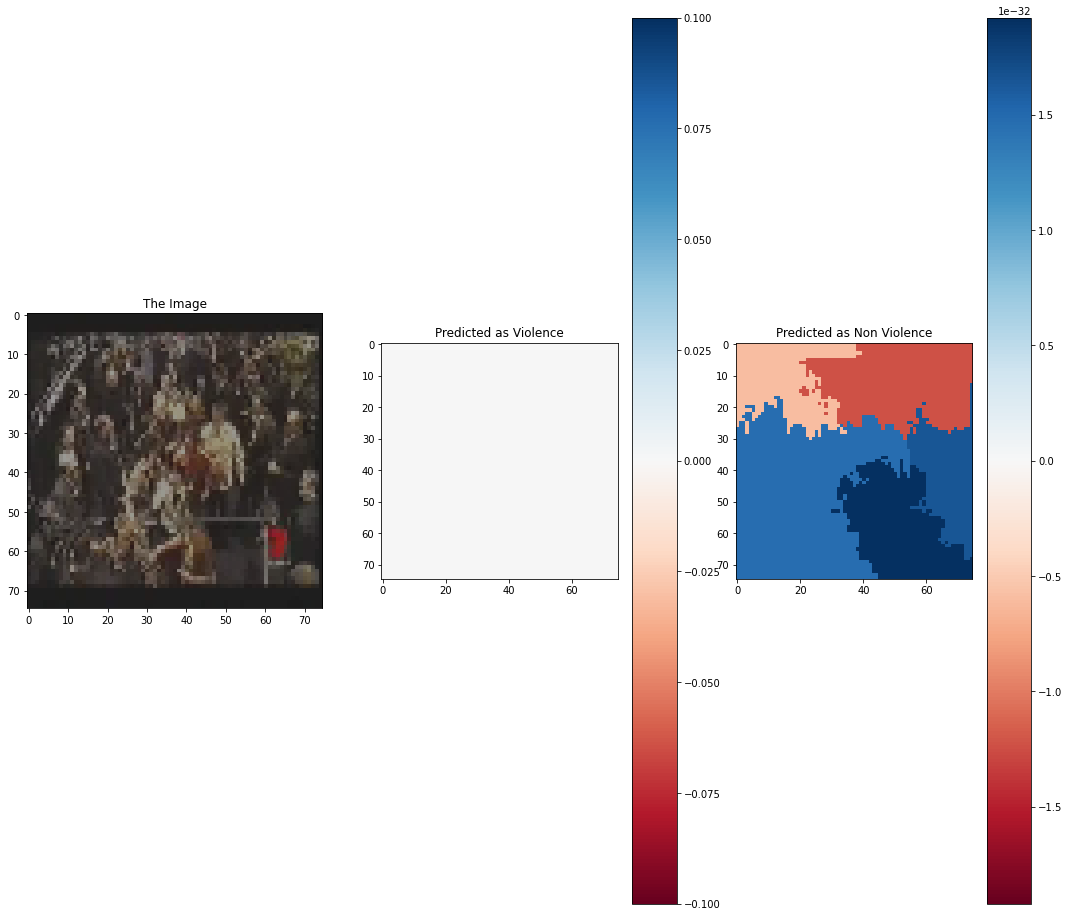

In [39]:
superpixels(explanationVGG16V, imgV, 0)

####Non violence

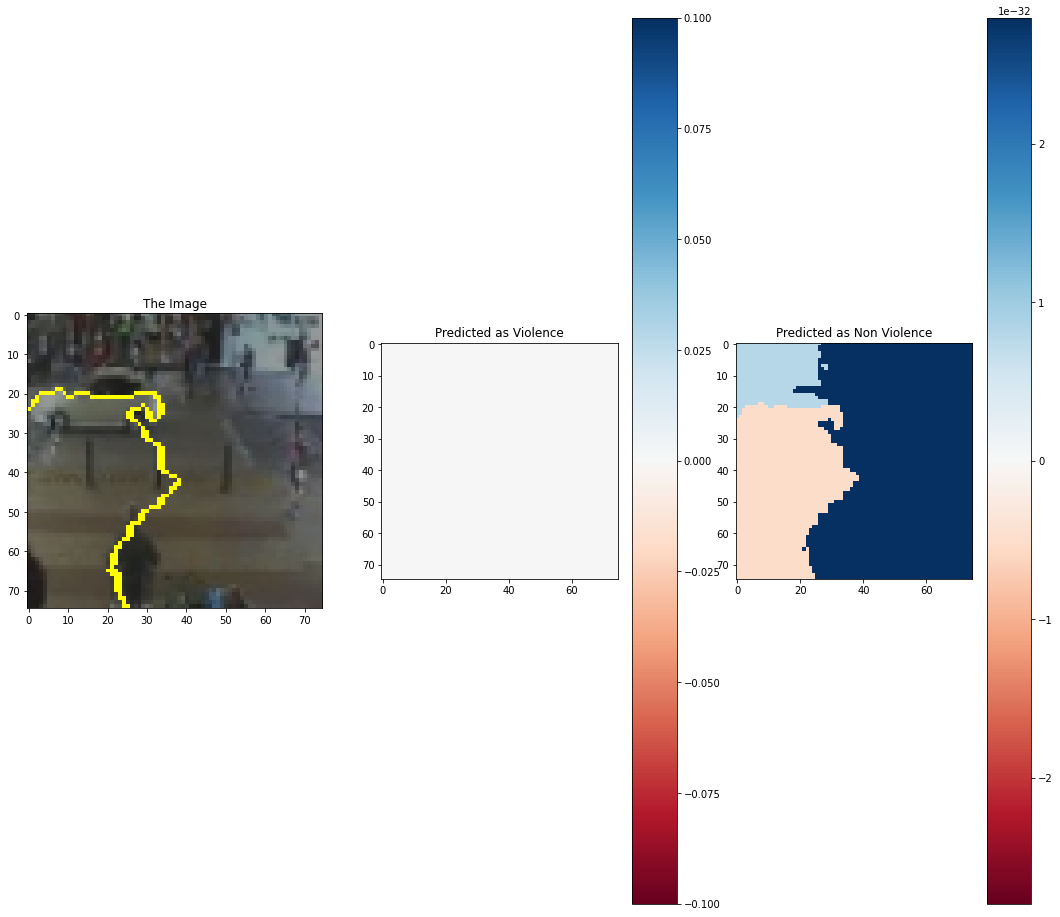

In [40]:
superpixels(explanationVGG16NV, imgNV, 1)

##AlexNet

In [41]:
explainerAlexNet = lime_image.LimeImageExplainer()

In [42]:
explainerAlexNetV = explainerAlexNet.explain_instance(imgV[0].astype('double'), alexNet.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


In [43]:
explainerAlexNetNV = explainerAlexNet.explain_instance(imgNV[0].astype('double'), alexNet.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


###Superpixel for the prediction

####Violence

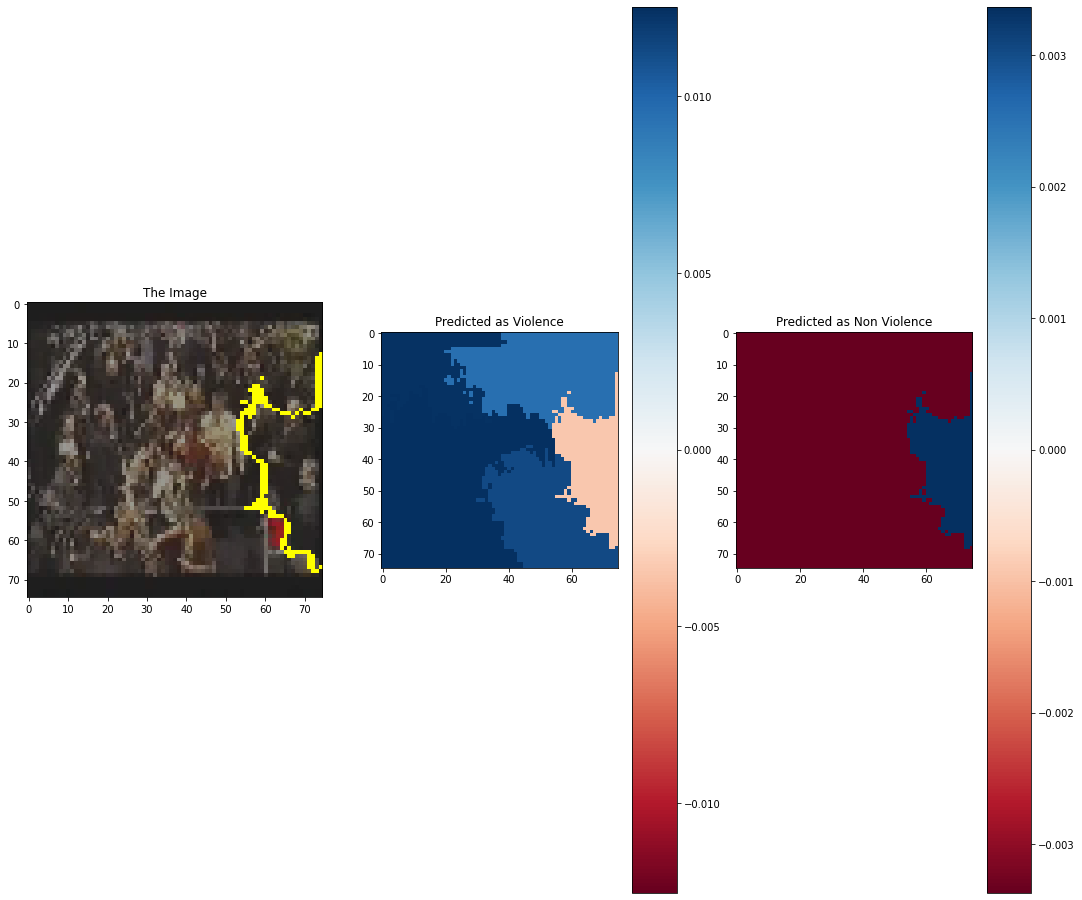

In [44]:
superpixels(explainerAlexNetV, imgV, 0)

####Non Violence

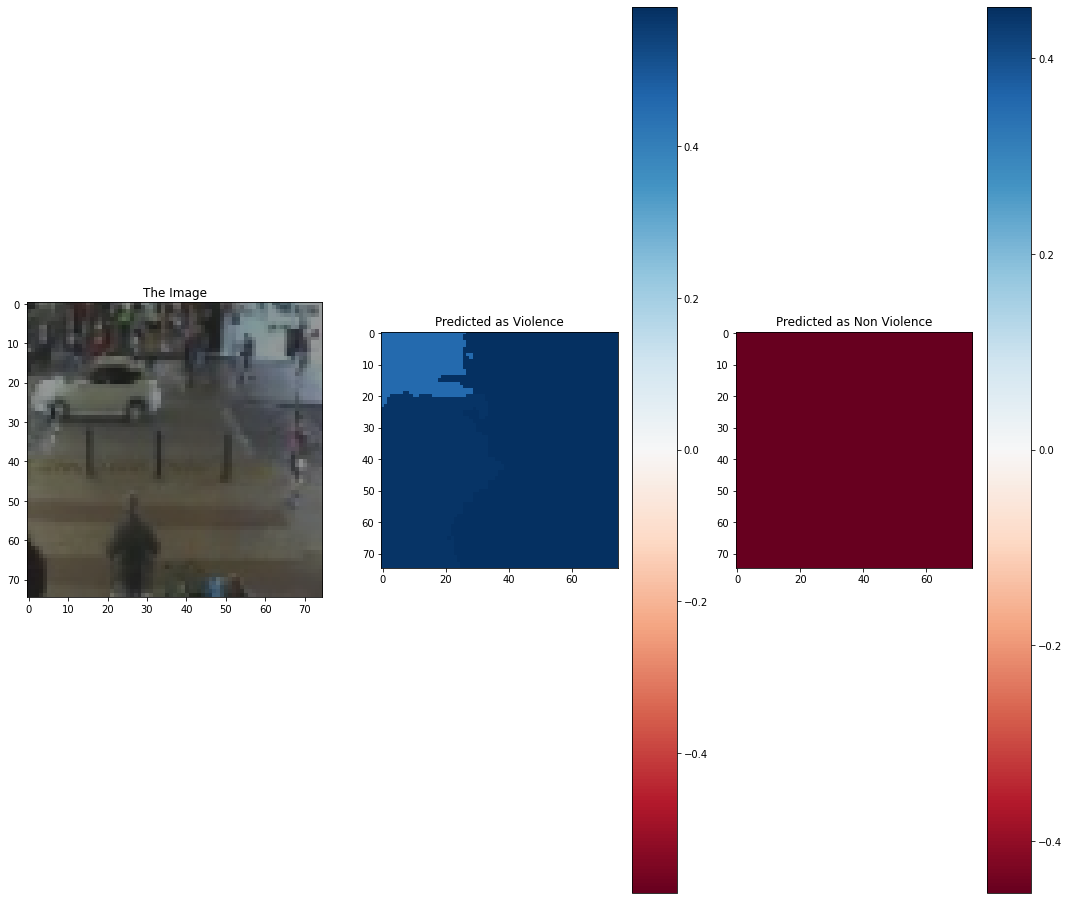

In [45]:
superpixels(explainerAlexNetNV, imgNV, 1)

##CNN+LSTM

In [46]:
explainerCNNLSTM = lime_image.LimeImageExplainer()

In [47]:
explainerCNN_LSTM_V = explainerCNNLSTM.explain_instance(imgV[0].astype('double'), cnnLstm.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


In [48]:
explainerCNN_LSTM_NV = explainerCNNLSTM.explain_instance(imgNV[0].astype('double'), cnnLstm.predict, top_labels = 2,hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


###Superpixel for the prediction

####Violence

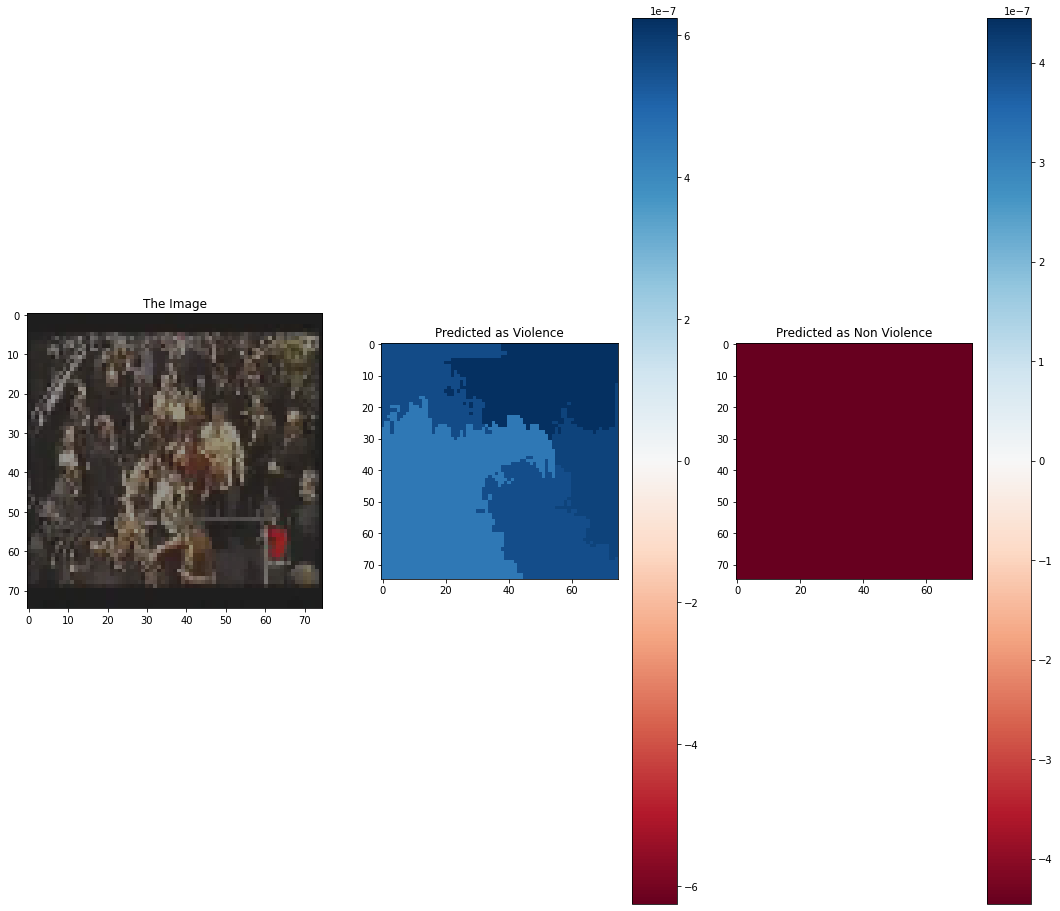

In [49]:
superpixels(explainerCNN_LSTM_V, imgV, 0)

####Non Violence

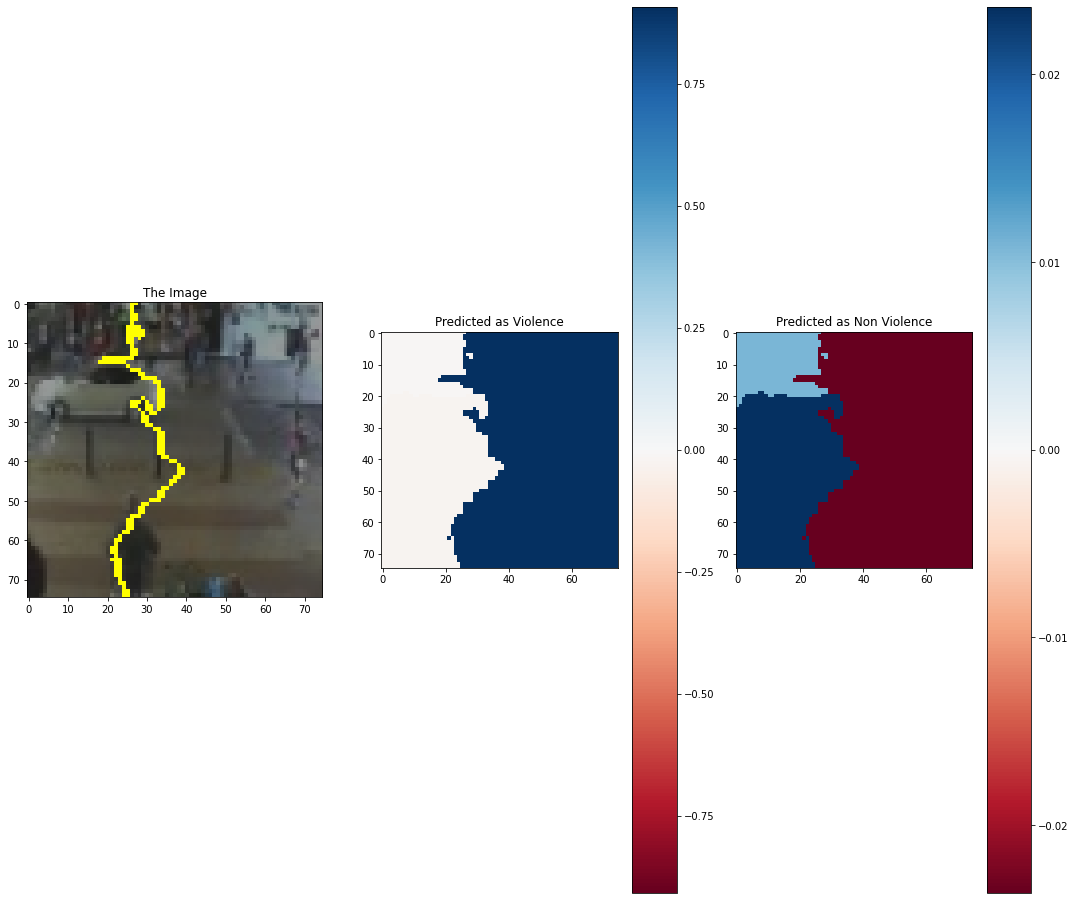

In [50]:
superpixels(explainerCNN_LSTM_NV, imgNV, 1)